# CIDACS: SUPORTE EM ROTINAS DE PRODUÇÃO DE DADOS - Data analysis / Practical Test

This is a practical and technical test whose objective is to evaluate how could you analyze and interprets data. The purpose of this test is to identify your capacity to analyze data and maybe to suggest news insights.

The dataset is related to the Basic Health Unity (UBS), it was disponibility by the Ministry of Health of Brazil, it shows the cities that received the program of the government.

Consider that you are working on a task that is part of delivering a project in production, so it is interesting to document and build well-structured code. Answers, code documentation and comments can be written in Portuguese.

## Challenge
Based on the data provided, answer the following questions:

1. Create a variable with the UF code (Unidade Federativa) where the UBS are located.
    1. What are the UF codes present in the database?
    2. What are the most frequent UF codes (the 5 most frequent) and how often do they occur?
    3. How many cities are there in these 5 most frequent UFs?
    
    Note: The first two digits of the municipality code represent the UF.

2. There is a fictitious date variable (`data_eq`) in the database created only for this selection process. Create a variable with the year extracted from that variable.
    1. Show the distribution of records by year.

3. Create a variable with the length of the phone field
    1. What are the least frequent lengths (the 5 least frequent) of phone numbers?
    2. How many records have a phone length other than 10? What is the percentage of this value considering the size of the database?
    
    Bonus Question: Is there information in the phone variable that does not correspond to a phone number? If so, remove this information.
    
4. How many records achieved an above or much above average performance regarding the status of the drugs? What is the percentage of this value considering the size of the database?

5. How many records in Bahia (code 29) achieved an average performance in relation to the situation of the drugs and a performance above or much above the average in relation to the situation of the equipment? What is the percentage of this value considering the size of the database?

6. How many records had the worst performance in all variables that measure performance situations? What is the percentage of this value considering the size of the database?


## Data dictionary


* cod_munic: `IBGE code, lenght: 7 characters.` 
* dsc_bairro: `Name of neighborhood.`
* dsc_cidade: `Name of city.`
* cod_cnes: `CNES code`
* nom_estab: `Name of the establishment`
* dsc_endereco: `Address of UBS`
* dsc_estrut_fisic_ambiencia: `Situation-related to general structure`
* dsc_adap_defic_fisic_idosos: `Situation-related to adaptations for the disabled and the elderly`
* dsc_equipamentos: `Situation-related to equipament`
* dsc_medicamentos: `Situation-related to medicine`
* data_eq: `Date variable`

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

database = pd.read_csv('ubs.csv')

# 1. Create a variable with the UF code (Unidade Federativa) where the UBS are located.

In [298]:
UF = database['cod_munic'].astype(str)
UF = UF.str[:2]
database['UF'] = UF
display(database)

,vlr_latitude,vlr_longitude,cod_munic,cod_cnes,nom_estab,dsc_endereco,dsc_bairro,dsc_cidade,dsc_telefone,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos,data_eq,UF
0,-10.911237,-37.062078,280030,3492,US OSWALDO DE SOUZA,TV ADALTO BOTELHO,GETULIO VARGAS,Aracaju,7931791326,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,2017-06-15,28
1,-9.485943,-35.857573,270770,6685315,USF ENFERMEIRO PEDRO JACINTO AREA 09,R 15 DE AGOSTO,CENTRO,Rio Largo,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2016-07-18,27
2,-23.896000,-53.410000,411885,6811299,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,RUA GUILHERME BRUXEL,CENTRO,Perobal,4436251462,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média,2017-09-11,41
3,-16.447874,-41.009860,313580,6335616,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,RUA TEOFILO OTONI,ALDEIA,Jequitinhonha,3337411423,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2017-02-28,31
4,-6.573311,-35.107605,250930,6662226,POSTO ANCORA URUBA,RODOVIA PB N 065,SITIO,Mataraca,Não se aplica,Desempenho acima da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2018-06-04,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37685,-9.900699,-44.541235,220320,2490390,PS DO ESPIRITO SANTO,ESPIRITO SANTO,NaN,Curimatá,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2018-02-22,22
37686,-12.165245,-61.709883,110029,2744155,PS LINHA P 18 NOVA SANTA LUZIA DOESTE,LINHA P 18 NOVA,NaN,Santa Luzia D'Oeste,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2017-02-14,11
37687,-6.050892,-36.936722,240610,2475936,POSTO DE SAUDE ADEQUE,SITIO ADEQUE,NaN,Jucurutu,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2018-02-09,24
37688,-15.351741,-40.779233,292665,2509555,POSTO DE SAUDE CAPINARANA,POVOADO CAPINARANA,NaN,Ribeirão do Largo,(77) 2291271,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,2016-02-11,29


# What are the UF codes present in the database?

In [299]:
uf_codes = pd.DataFrame(pd.unique(database['UF']))
uf_codes.columns = ['UF']
display(uf_codes)

,UF
0,28
1,27
2,41
3,31
4,25
5,23
6,21
7,13
8,51
9,52


# What are the most frequent UF codes (the 5 most frequent) and how often do they occur?

In [300]:
most_freqUF = pd.DataFrame(pd.value_counts(database['UF']).head(5))
most_freqUF.columns = ['Frequency']
most_freqUF['UF'] = most_freqUF.index
display(most_freqUF)

,Frequency,UF
31,4859,31
35,4169,35
29,3571,29
41,2408,41
43,2225,43


# How many cities are there in these 5 most frequent UFs?

In [301]:
#Organizar por UF e contar os valores únicos de municípios
UF_group = database.groupby('UF')['cod_munic'].nunique()
#Usar DF
UF_group = pd.DataFrame(UF_group)
UF_group['UF'] = UF_group.index

#Comparar UF agrupado com UF mais frequente
UF_group.query("UF in %s" % most_freqUF['UF'].values.tolist())


,cod_munic,UF
UF,,
29,417,29
31,849,31
35,643,35
41,398,41
43,493,43


# 2. There is a fictitious date variable (`data_eq`) in the database created only for this selection process. Create a variable with the year extracted from that variable.


In [302]:
database['year'] = database['data_eq'].str[:4]

# Show the distribution of records by year.

,records,year
2018,12611,2018
2017,12551,2017
2016,12528,2016


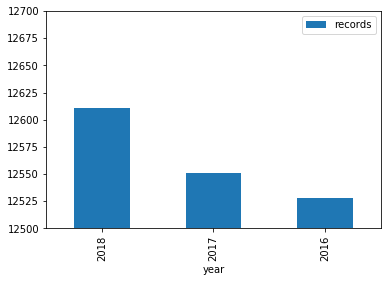

In [303]:
year_dist = pd.value_counts(database['year']).to_frame()
year_dist.columns = ['records']
year_dist['year'] = year_dist.index
display(year_dist)

year_dist.plot(kind = 'bar', x = 'year', y='records')
plt.ylim(12500, 12700)
plt.show()

# 3. Create a variable with the length of the phone field

In [304]:
#Bonus Question: Is there information in the phone variable that does not correspond to a phone number? If so, remove this information.
def check_phone_num(phone):
    phone = phone.translate({ord(i): None for i in '()'})
    if phone.isnumeric():	
        return phone
    else:
        return ''

database['dsc_telefone'] = database['dsc_telefone'].apply(check_phone_num)
database['phone_len'] = database['dsc_telefone'].apply(len)


# What are the least frequent lengths (the 5 least frequent) of phone numbers?

In [305]:
most_freq_phone_len = pd.DataFrame(pd.value_counts(database['phone_len']))
most_freq_phone_len.columns = ['Frequency']
most_freq_phone_len['length'] = most_freq_phone_len.index
most_freq_phone_len = most_freq_phone_len.drop([0], axis = 0)
display(most_freq_phone_len.tail(5))


,Frequency,length
8,1886,8
7,498,7
11,104,11
5,2,5
6,1,6


# How many records have a phone length other than 10? 

In [306]:
most_freq_phone_len[most_freq_phone_len['length']!=10].count()['length']

6

# What is the percentage of this value considering the size of the database?

In [307]:
percent = most_freq_phone_len[most_freq_phone_len['length']!=10].sum()['Frequency']/most_freq_phone_len.sum()['Frequency']*100

print('Percentage of the records that have a phone length other than 10: %.2f%%' % percent)


Percentage of the records that have a phone length other than 10: 19.55%


# 4. How many records achieved an above or much above average performance regarding the status of the drugs? 

In [308]:
drugs = database.apply(lambda x : True
    if 'acima' in x['dsc_medicamentos'] else False, axis = 1)
good_records = len(drugs[drugs == True].index)
print(good_records)

16949


# What is the percentage of this value considering the size of the database?

In [309]:
drugs_percent = good_records/len(drugs)*100
print('percentage of above or much above average: %.2f%%' % drugs_percent)

percentage of above or much above average: 44.97%


# 5. How many records in Bahia (code 29) achieved an average performance in relation to the situation of the drugs and a performance above or much above the average in relation to the situation of the equipment?

In [310]:
def situation5(x):
    if x['UF'] == '29' and 'mediano' in x['dsc_medicamentos'] and 'acima' in x['dsc_equipamentos']:
        return True
    else:
        return False

records_5 = database.apply(situation5, axis = 1)
records_5_match = len(records_5[records_5 == True].index)
print('answer: %4d records' % records_5_match)


answer:  207 records


# What is the percentage of this value considering the size of the database?

In [311]:
records_5_percent = records_5_match/len(records_5)*100
print('percentage of above or much above average: %.2f%%' % records_5_percent)

percentage of above or much above average: 0.55%


# 6. How many records had the worst performance in all variables that measure performance situations?

In [312]:
def situation6(x):
    if 'mediano' in x['dsc_medicamentos'] and 'mediano' in x['dsc_equipamentos'] and 'mediano' in x['dsc_estrut_fisic_ambiencia'] and 'mediano' in x['dsc_adap_defic_fisic_idosos']:
        return True
    else:
        return False

records_6 = database.apply(situation6, axis = 1)
records_6_match = len(records_6[records_6 == True].index)
print('answer: %4d records' % records_6_match)

answer: 10317 records


# What is the percentage of this value considering the size of the database?

In [313]:
records_6_percent = records_6_match/len(records_6)*100
print('percentage of worst performance: %.2f%%' % records_6_percent)

percentage of worst performance: 27.37%


Fontes:

* https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
* https://pandas.pydata.org/
* https://www.w3schools.com/python/python_lambda.asp
* https://www.journaldev.com/23674/python-remove-character-from-string#:~:text=Output%3A%20bc12321cb-,Python%20Remove%20Character%20from%20String%20using%20translate(),it%20from%20the%20result%20string.
* https://docs.python.org/3/
* https://matplotlib.org/


